In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.style as style
import numpy as np
import seaborn as sns
import math
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, LassoCV, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

In [7]:
wine_data = pd.read_csv('/Users/ajz/Desktop/DS3001/Project/TrainDataNormalized.csv', index_col=0).reset_index(drop=True)
x_data_cols = [col for col in wine_data if col!= 'points']
wine_subset = wine_data.sample(frac=1)
wine_data.head(5)

,points,price,year,wine_keywords,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,...,variety_Riesling,variety_Rosé,variety_Sangiovese,variety_Sauvignon Blanc,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_Viognier,variety_White Blend,variety_Zinfandel
0,89,0.562968,0.891097,1.442387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,91,1.331384,0.891097,0.135968,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,88,2.291904,-2.030542,1.442387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90,-1.358073,0.625494,-1.170451,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,91,-0.077379,0.891097,-0.299505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Split into train and test
wine_norm_df = wine_subset
wine_data_train = wine_norm_df[:int(0.7*len(wine_norm_df))].reset_index(drop=True)
wine_data_test = wine_norm_df[int(0.7*len(wine_norm_df)):].reset_index(drop=True)

In [10]:
train_x = wine_data_train[x_data_cols]
test_x = wine_data_test[x_data_cols]
train_y = wine_data_train['points']
test_y = wine_data_test['points']
train_x.head(5)

,price,year,wine_keywords,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,...,variety_Riesling,variety_Rosé,variety_Sangiovese,variety_Sauvignon Blanc,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_Viognier,variety_White Blend,variety_Zinfandel
0,-0.589657,-0.436920,1.006914,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.691037,-0.968128,-0.299505,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.589657,-0.702524,1.006914,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.178760,1.156701,1.442387,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.587522,-0.171317,0.135968,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
# Apply PCA
# Make an instance of the Model
pca = PCA()

# Apply PCA model
train_x_pca = pca.fit_transform(train_x)
test_x_pca= pca.transform(test_x)

Text(0, 0.5, 'Cumulative Explained Variance')

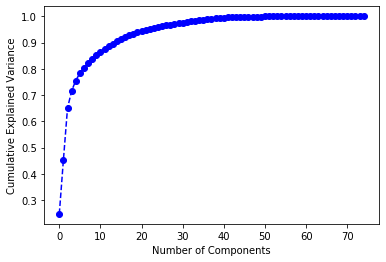

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '--bo')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Text(0, 0.5, 'Proportion of Explained Variance')

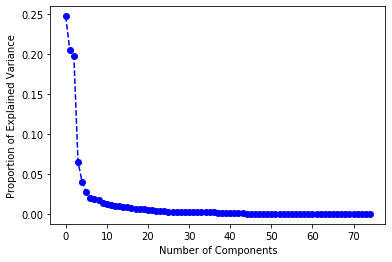

In [13]:
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance, '--bo')
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Explained Variance')

In [14]:
sum = 0
for i in range(len(explained_variance)):
    minimum_component = 0
    sum += explained_variance[i]
    if sum>0.95:
        minimum_component = i
        break
print(minimum_component)


22


In [15]:
train_x.head(5)

,price,year,wine_keywords,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,...,variety_Riesling,variety_Rosé,variety_Sangiovese,variety_Sauvignon Blanc,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_Viognier,variety_White Blend,variety_Zinfandel
0,-0.589657,-0.436920,1.006914,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.691037,-0.968128,-0.299505,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.589657,-0.702524,1.006914,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.178760,1.156701,1.442387,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.587522,-0.171317,0.135968,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
# Apply AGAIN PCA
# Make an instance of the Model
pca_N = PCA(n_components=minimum_component)

# Apply PCA model
train_x_Npca = pca_N.fit_transform(train_x)
test_x_Npca= pca_N.transform(test_x)


In [17]:
print(train_x_Npca.shape)

(53389, 22)


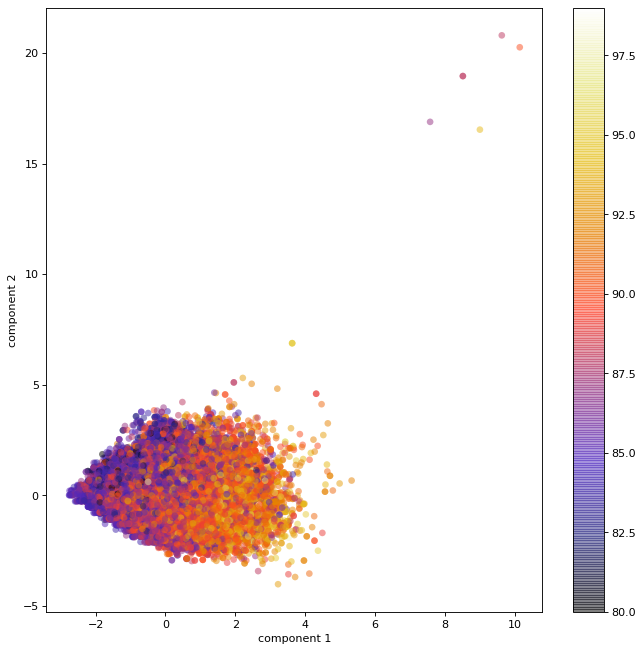

In [18]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(train_x_Npca[:, 0], train_x_Npca[:, 1],
            c=train_y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

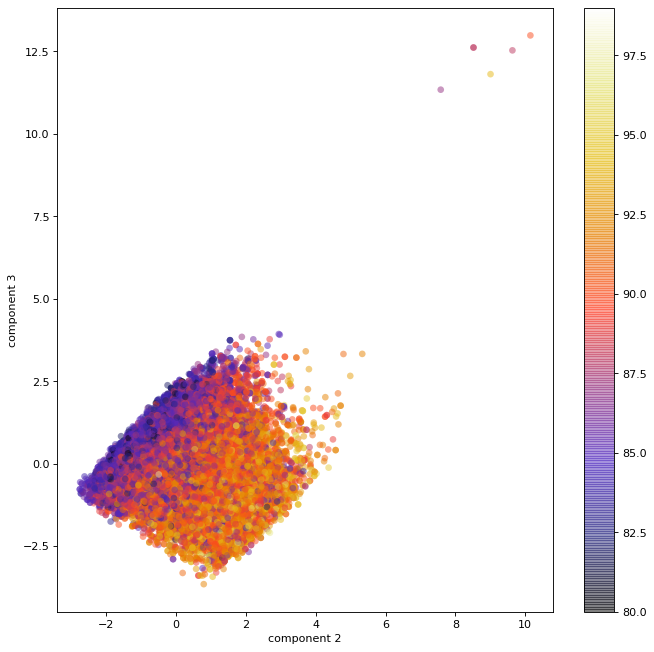

In [19]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(train_x_Npca[:, 0], train_x_Npca[:, 2],
            c=train_y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap'))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar();

In [20]:
def train_test_basic(train_x, train_y, test_x, test_y, reg_type):
    regression = {'LinearRegression': LinearRegression(), 'SGDRegressor': SGDRegressor(), 
                      'LassoCV': LassoCV(cv=10, random_state=0), 'ElasticNet':ElasticNet(),
                          'LinearSVR':LinearSVR(),'RandomForestRegressor':RandomForestRegressor(),  
                              'DecisionTreeRegressor': DecisionTreeRegressor()}
    model = regression[reg_type].fit(train_x, train_y)
    r2_ = r2_score(test_y, model.predict(test_x))
    mse = mean_squared_error(test_y, model.predict(test_x))
    return (model, r2_, mse)

In [21]:
# With PCA
regressions = ['LinearRegression','SGDRegressor','LassoCV', 'ElasticNet', 'LinearSVR',
               'RandomForestRegressor', 'DecisionTreeRegressor']
for regressor in regressions:
    model, r2, mse = train_test_basic(train_x_Npca, train_y, test_x_Npca, test_y, regressor)
    print("{}: R2-Score: {} MSE: {}".format(regressor, r2, mse))

LinearRegression: R2-Score: 0.34252031000350647 MSE: 5.7394544281580195
SGDRegressor: R2-Score: 0.3421696719389945 MSE: 5.742515315395548
LassoCV: R2-Score: 0.34253237764453814 MSE: 5.739349083952244
ElasticNet: R2-Score: 0.16591686356206137 MSE: 7.281110312177382
LinearSVR: R2-Score: 0.3396350869986696 MSE: 5.764640918635653
RandomForestRegressor: R2-Score: 0.49299485153331846 MSE: 4.425890242300151
DecisionTreeRegressor: R2-Score: 0.23673373725193825 MSE: 6.662915977855299


In [22]:
# Without PCA
for regressor in regressions:
    print("{}: R2-Score: {}".format(regressor, train_test_basic(train_x, train_y, 
                                                                test_x, test_y, regressor)[1]))

LinearRegression: R2-Score: -1.678698387163868e+18
SGDRegressor: R2-Score: 0.34815756460130964
LassoCV: R2-Score: 0.34832907080445985
ElasticNet: R2-Score: 0.18553037209511758
LinearSVR: R2-Score: 0.3480788567705839
RandomForestRegressor: R2-Score: 0.4828415504275163
DecisionTreeRegressor: R2-Score: 0.2752213340459052


In [23]:
def evaluate_test(test_x, test_y, model):
    preds = model.predict(test_x)
    print("R2: {}, MSE: {}".format(r2_score(test_y, preds), mean_squared_error(test_y, preds)))

In [25]:
rf, score, mse= train_test_basic(train_x, train_y, test_x, test_y, 'RandomForestRegressor')
csv_ = pd.read_csv('finalTestDataNormalized.csv')
x_cols = [col for col in train_x.columns]
print("Final Test Set Performance")
evaluate_test(csv_[x_cols], csv_['points'],rf)

Final Test Set Performance
R2: 0.7247934217700642, MSE: 2.4082328771754815


In [26]:
# Features Importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(csv_[x_cols].shape[1]):
    print("{}. {} {} ".format(f + 1, x_cols[indices[f]], round(importances[indices[f]]*100)))

Feature ranking:
1. price 44.0 
2. year 15.0 
3. wine_keywords 12.0 
4. variety_Other 2.0 
5. country_US 2.0 
6. variety_Chardonnay 2.0 
7. variety_Pinot Noir 1.0 
8. variety_Red Blend 1.0 
9. variety_Riesling 1.0 
10. variety_Cabernet Sauvignon 1.0 
11. country_France 1.0 
12. variety_Bordeaux-style Red Blend 1.0 
13. variety_Syrah 1.0 
14. country_Italy 1.0 
15. variety_Sauvignon Blanc 1.0 
16. variety_Zinfandel 1.0 
17. country_Spain 1.0 
18. country_Austria 1.0 
19. variety_Rosé 1.0 
20. variety_Merlot 1.0 
21. country_Portugal 1.0 
22. country_Argentina 1.0 
23. country_Chile 1.0 
24. variety_Malbec 1.0 
25. variety_White Blend 1.0 
26. variety_Cabernet Franc 0.0 
27. variety_Sangiovese 0.0 
28. country_Australia 0.0 
29. variety_Rhône-style Red Blend 0.0 
30. variety_Tempranillo 0.0 
31. variety_Nebbiolo 0.0 
32. variety_Portuguese Red 0.0 
33. variety_Viognier 0.0 
34. variety_Pinot Gris 0.0 
35. variety_Sparkling Blend 0.0 
36. country_Germany 0.0 
37. variety_Bordeaux-style Wh

<Figure size 432x288 with 0 Axes>

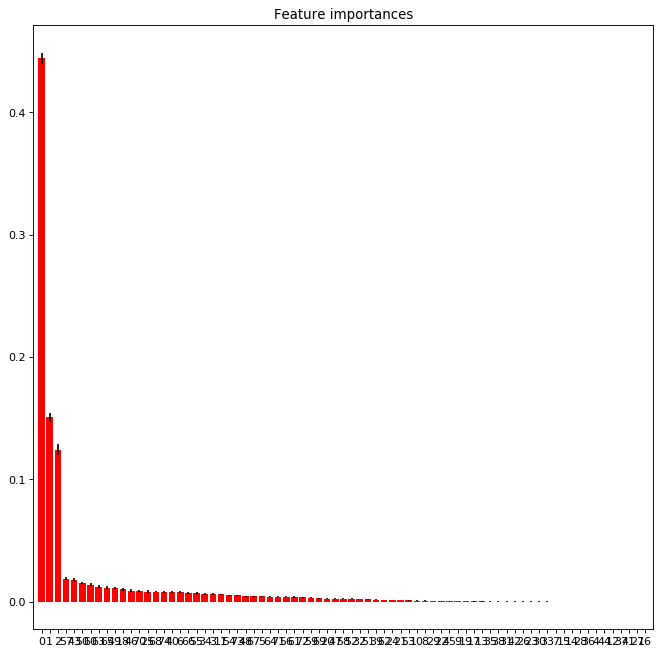

In [27]:
# Plot the feature importances of the forest
plt.figure()
plt.figure(figsize=(10, 10), dpi=80)
plt.title("Feature importances")
plt.bar(range(csv_[x_cols].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(csv_[x_cols].shape[1]), indices)
plt.xlim([-1, csv_[x_cols].shape[1]])
plt.show()

In [ ]:
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rf.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=x_cols,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1